In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import psycopg2 as pg 
from config import password

In [3]:
conn = pg.connect(f"host=localhost dbname=employees_db user=postgres password={password}")

In [4]:
salary_df = pd.read_sql("SELECT * FROM salary",conn)
salary_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


array([[<AxesSubplot:title={'center':'salary'}>]], dtype=object)

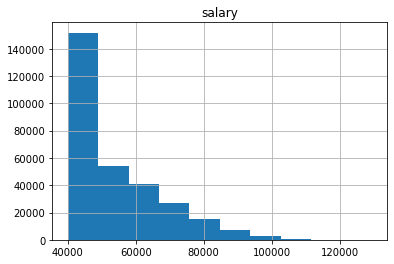

In [5]:
hist_fig = salary_df.hist(column='salary')
hist_fig

In [16]:
avg_salary_df = pd.read_sql("SELECT s.salary, t.title FROM salary AS s INNER JOIN employees AS e ON s.emp_no = e.emp_no INNER JOIN titles AS t ON e.emp_title = t.title_id",conn)
avg_salary_df.head()

avg_salary_group = avg_salary_df.groupby('title')
average_sal_by_title = avg_salary_group.mean()

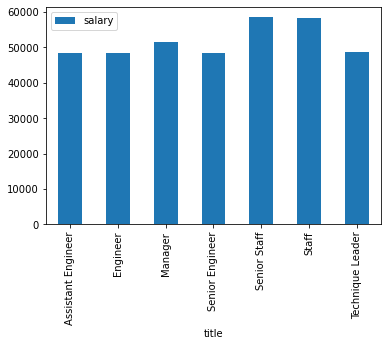

In [17]:
bar_fig = average_sal_by_title.plot.bar()

In [18]:
# Searching "your" own employee id number
thejoke_df = pd.read_sql("select * from employees where emp_no = 499942;",conn)
thejoke_df.head()

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10
